In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import pdb

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(97)

In [2]:
# python function to get the base pair usage at each position in a list of sequences
def get_base_usage(seqs):
    # initialize a dictionary to store the base usage
    base_usage = {'A':[], 'C':[], 'G':[], 'T':[]}
    # loop through each position in the sequences
    for i in range(len(seqs[0])):
        # initialize a dictionary to store the base counts at this position
        base_counts = {'A':0, 'C':0, 'G':0, 'T':0}
        # loop through each sequence
        for seq in seqs:
            # add the base at this position to the base counts
            base_counts[seq[i]] += 1
        # loop through each base
        for base in base_counts:
            # add the base count to the base usage
            base_usage[base].append(base_counts[base])
    # return the base usage
    return base_usage

# function to create a stacked bar plot of the base usage at each position
def plot_base_usage(base_usage, title, ax):
    # initialize a list to store the positions
    positions = []
    # initialize a list to store the bottom of each bar
    bottoms = [0]*len(base_usage['A'])
    # loop through each position
    for i in range(len(base_usage['A'])):
        # add the position to the list of positions
        positions.append(i+1)
    # loop through each base
    for base in base_usage:
        # plot the base usage
        ax.bar(positions, base_usage[base], bottom=bottoms, label=base)
        # add the base usage to the bottoms
        bottoms = np.add(bottoms, base_usage[base])
    ax.set_ylabel("Number of sequences with base")
    ax.set_xlabel("Position")
    # add a title to the plot
    ax.set_title(title)
    # add a legend to the plot
    ax.legend()
    
# function to create a bar plot of the base usage entropy at each position
def plot_base_entropy(base_usage, title, ax):
    base_usage_np = []
    for key in base_usage:
        base_usage[key] = np.array(base_usage[key])
        base_usage_np.append(base_usage[key])
    base_usage_np = np.stack(base_usage_np)
    base_entropy = stats.entropy(base_usage_np, base=2, axis=0)
    
    # initialize a list to store the positions
    positions = []
    # loop through each position
    for i in range(len(base_usage['A'])):
        # add the position to the list of positions
        positions.append(i+1)
    
    # loop through each base
    for base in base_usage:
        # plot the base usage
        ax.bar(positions, base_entropy)
    ax.set_ylabel("Base entropy")
    ax.set_xlabel("Position")
    ax.set_ylim(0, 2)
    # add a title to the plot
    ax.set_title(title)

In [3]:
final_design_seqs_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/final_design/"

coms None


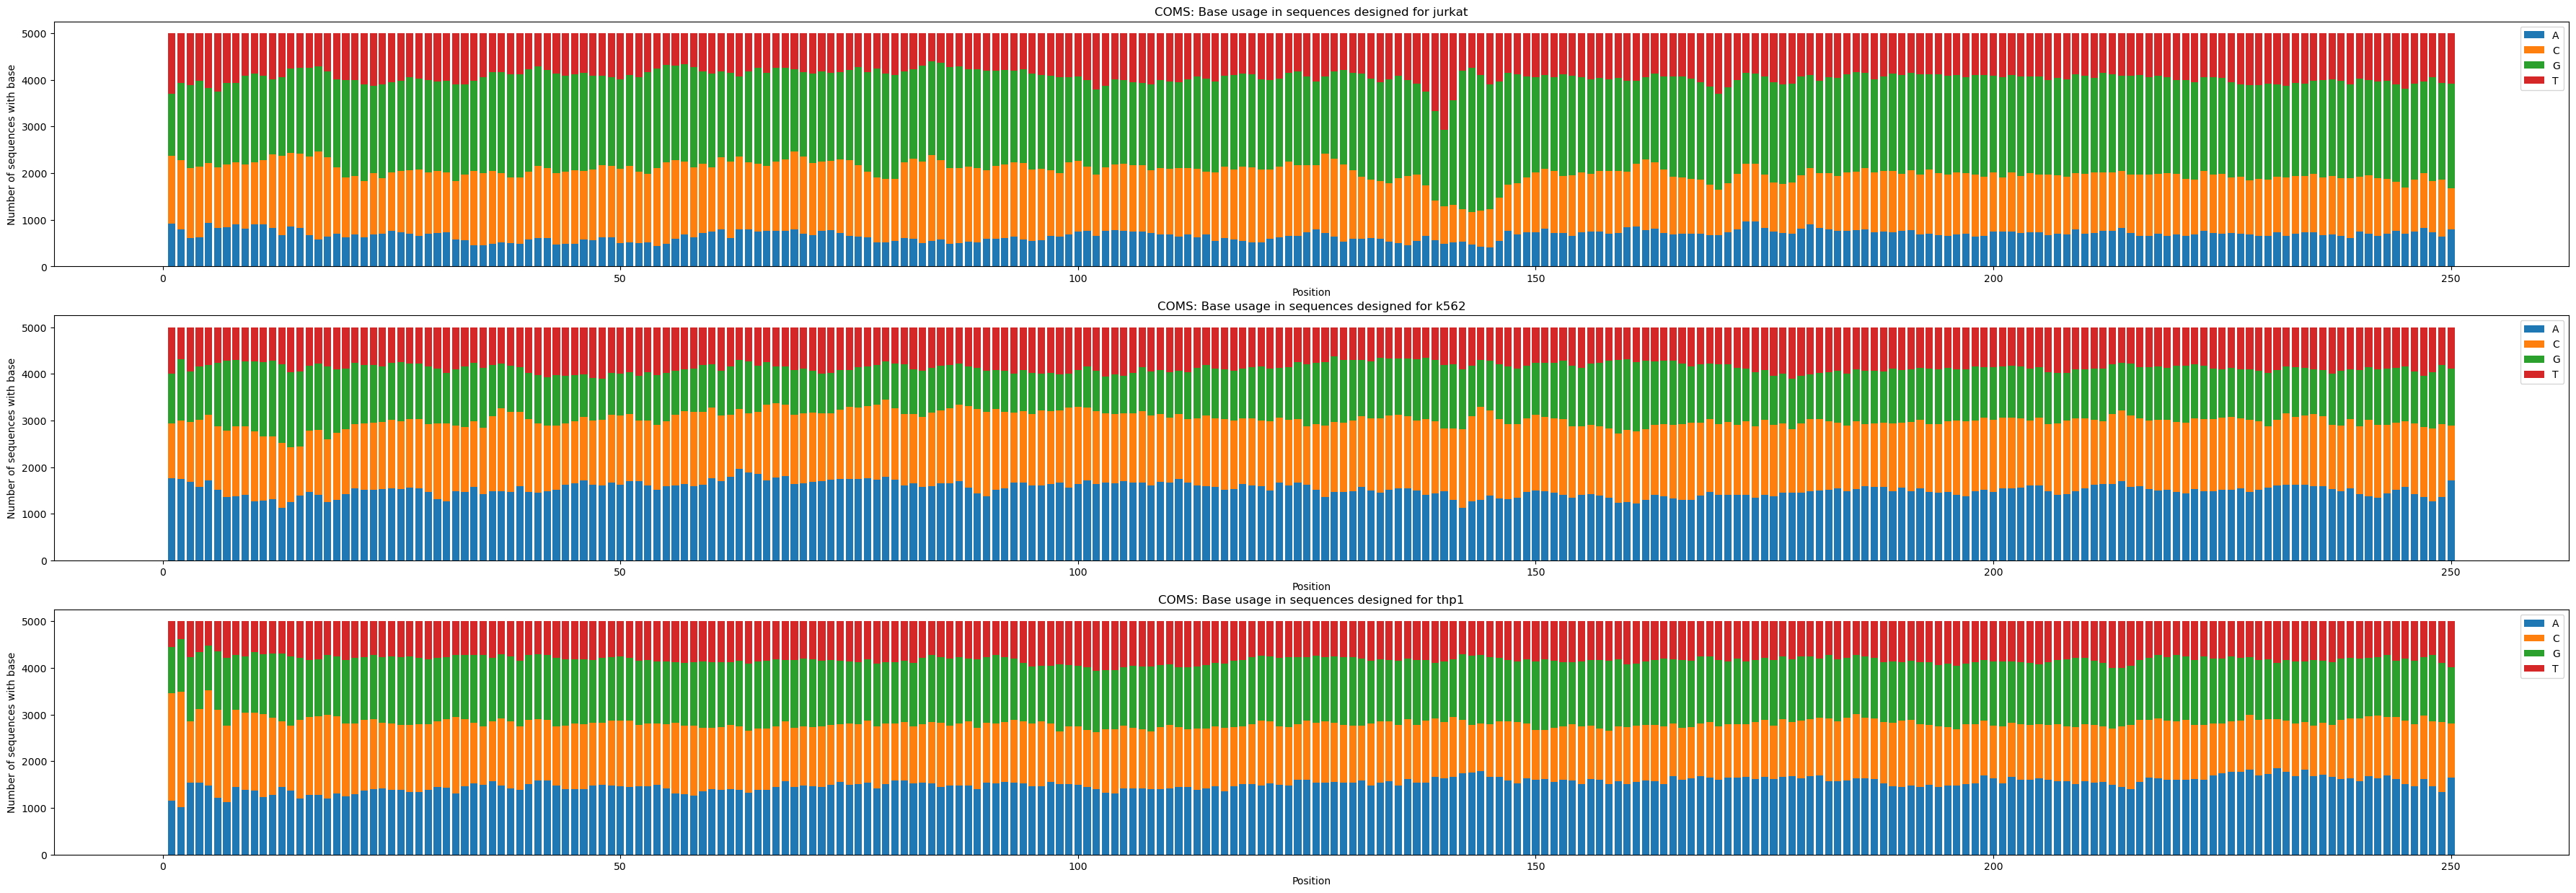

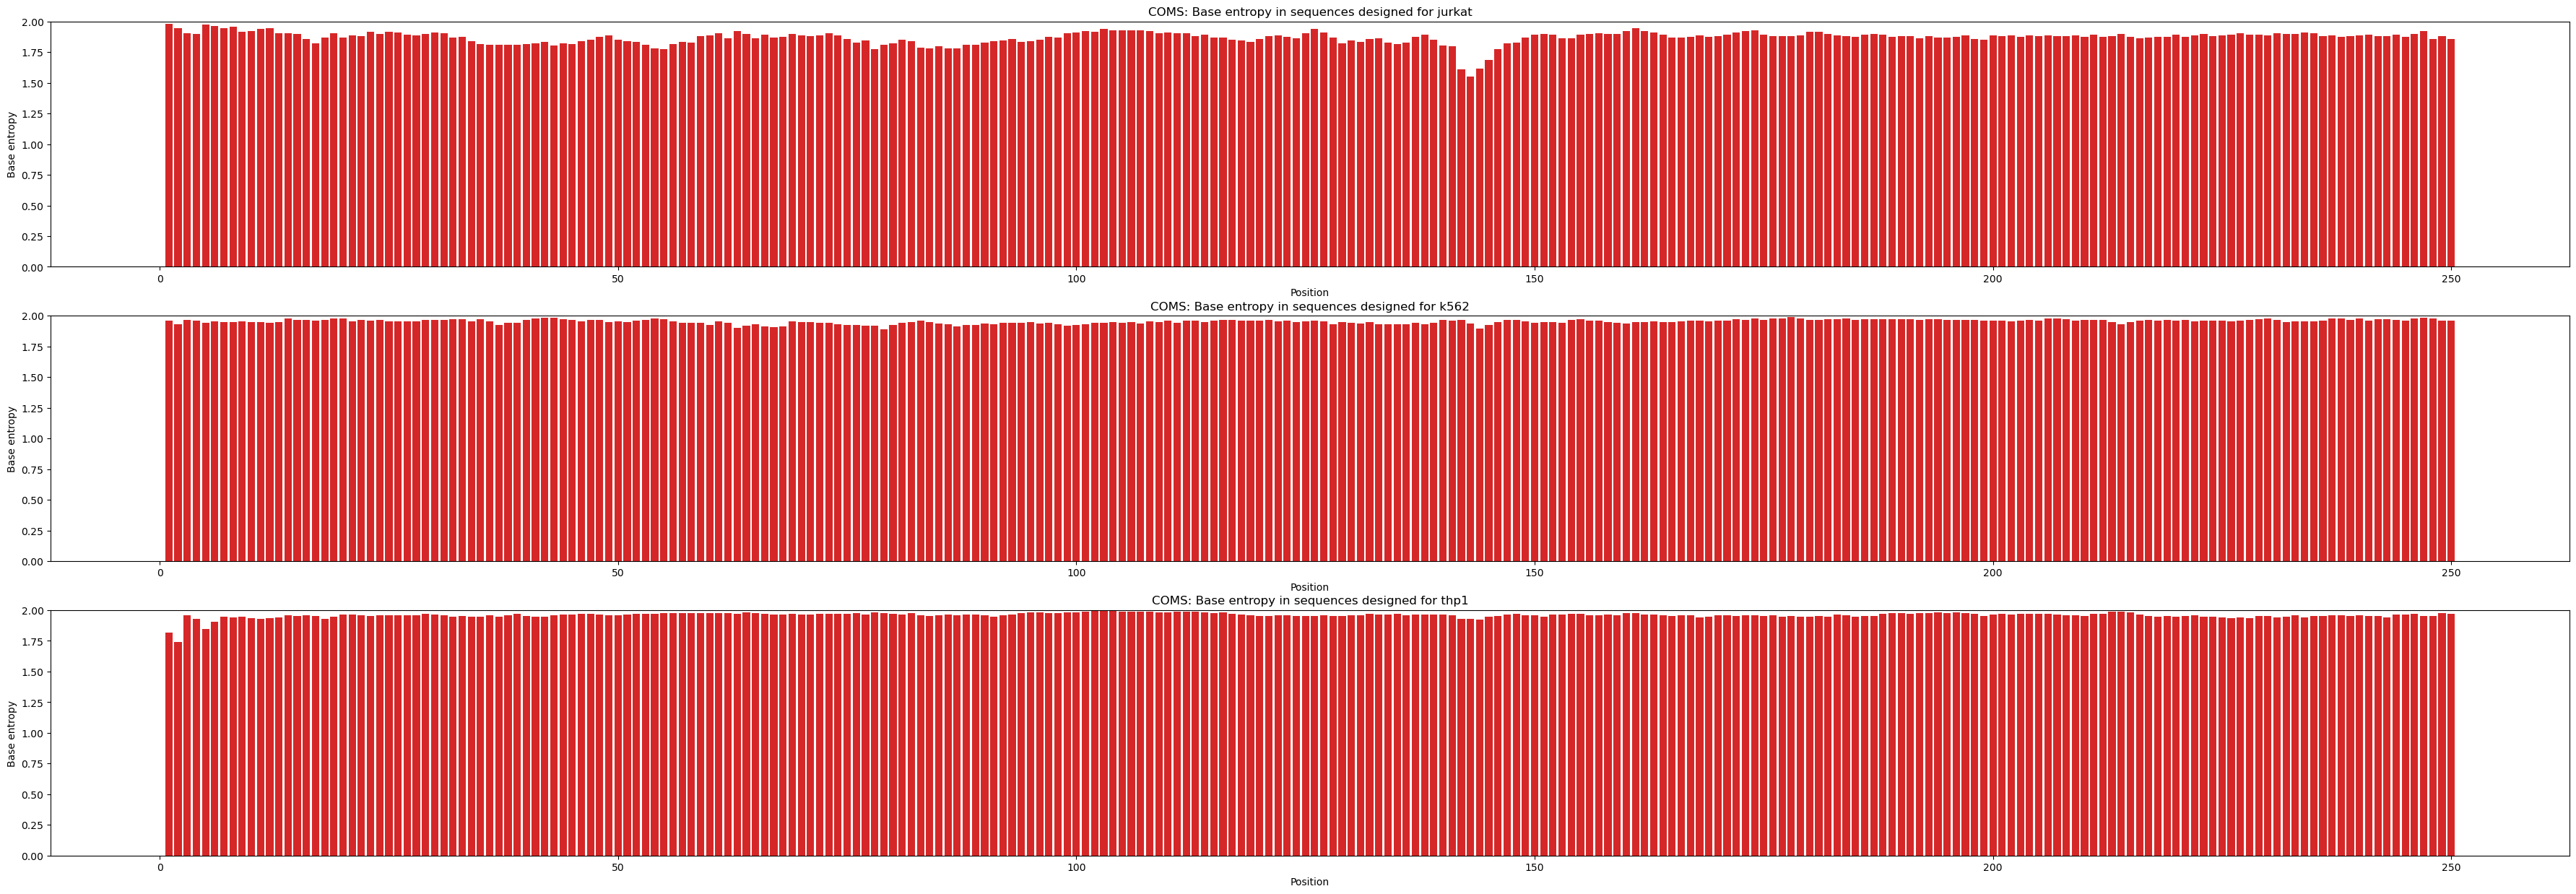

dens None


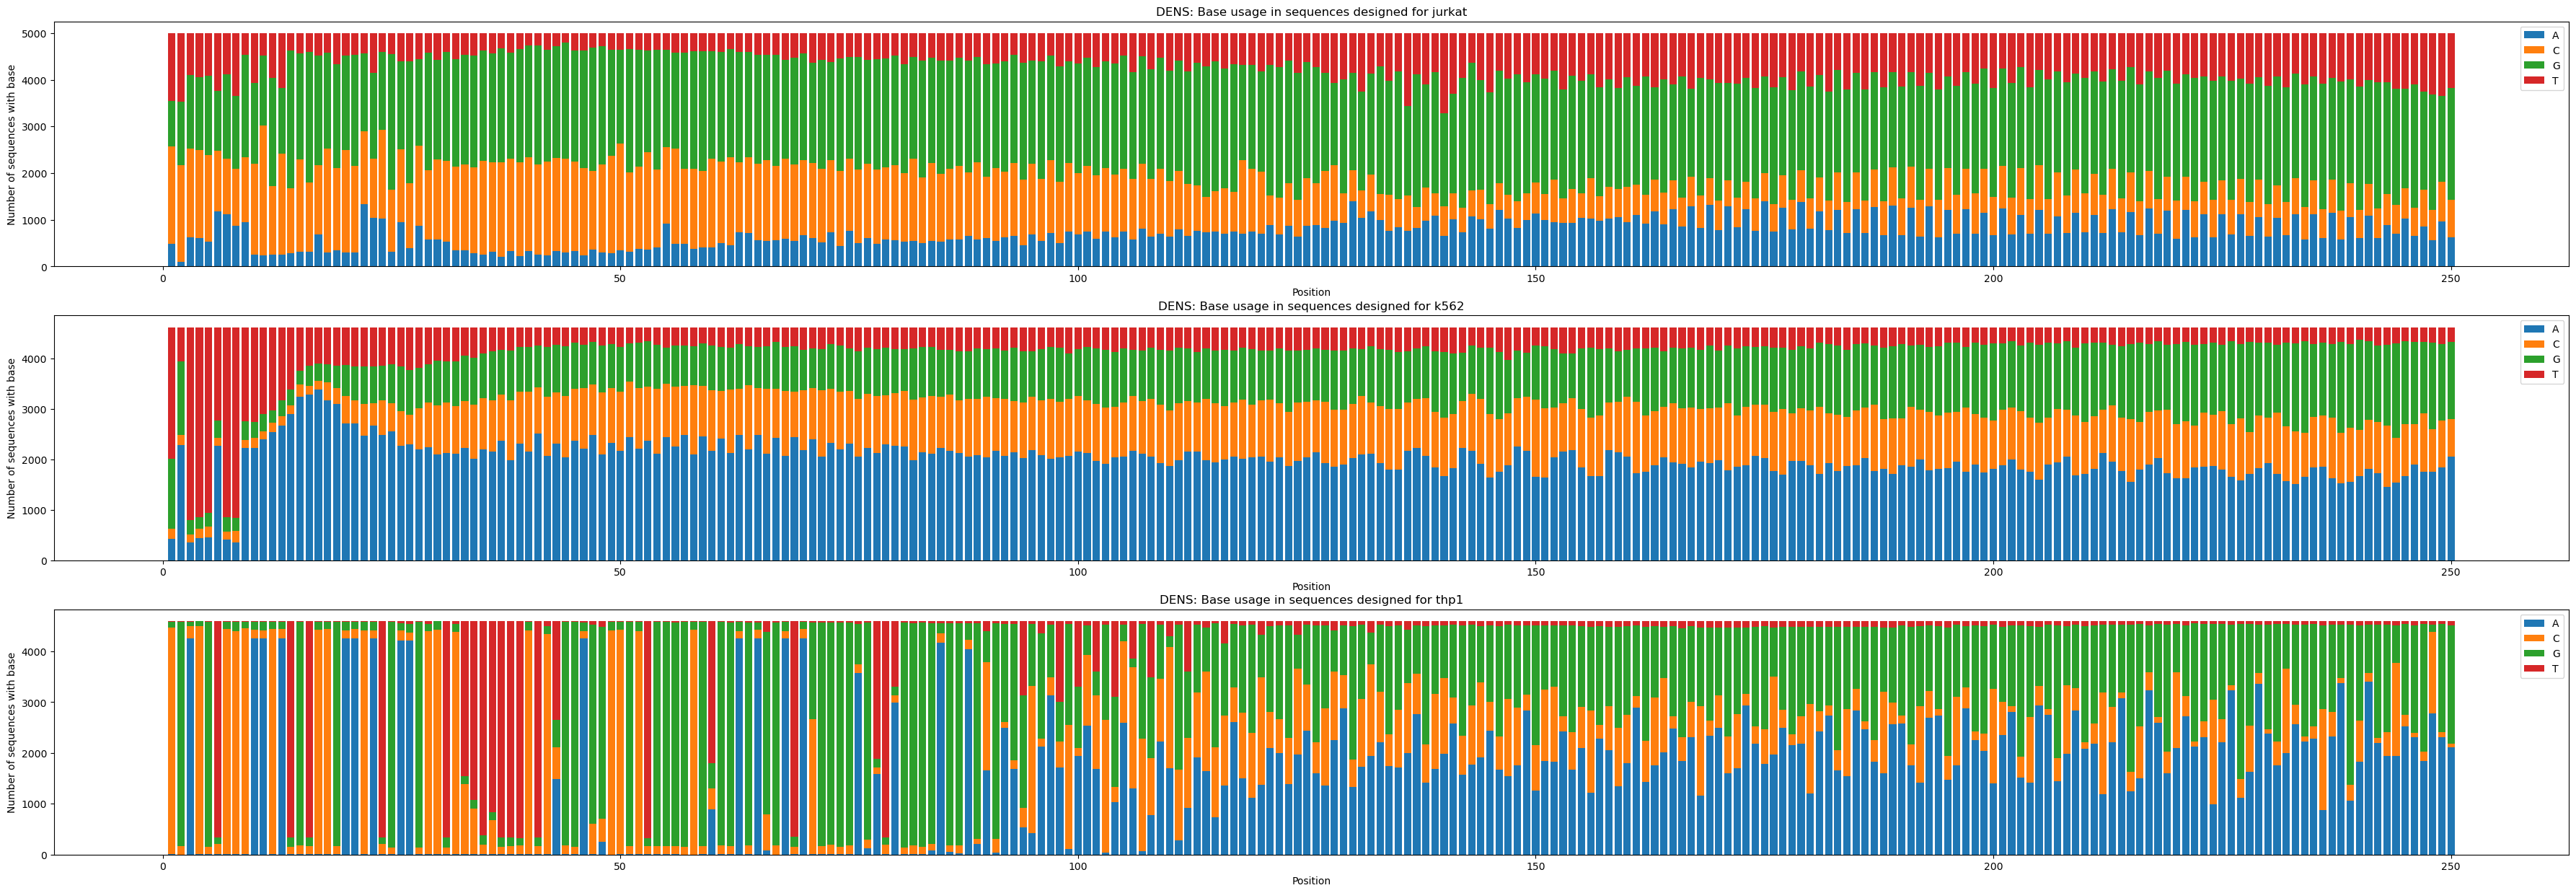

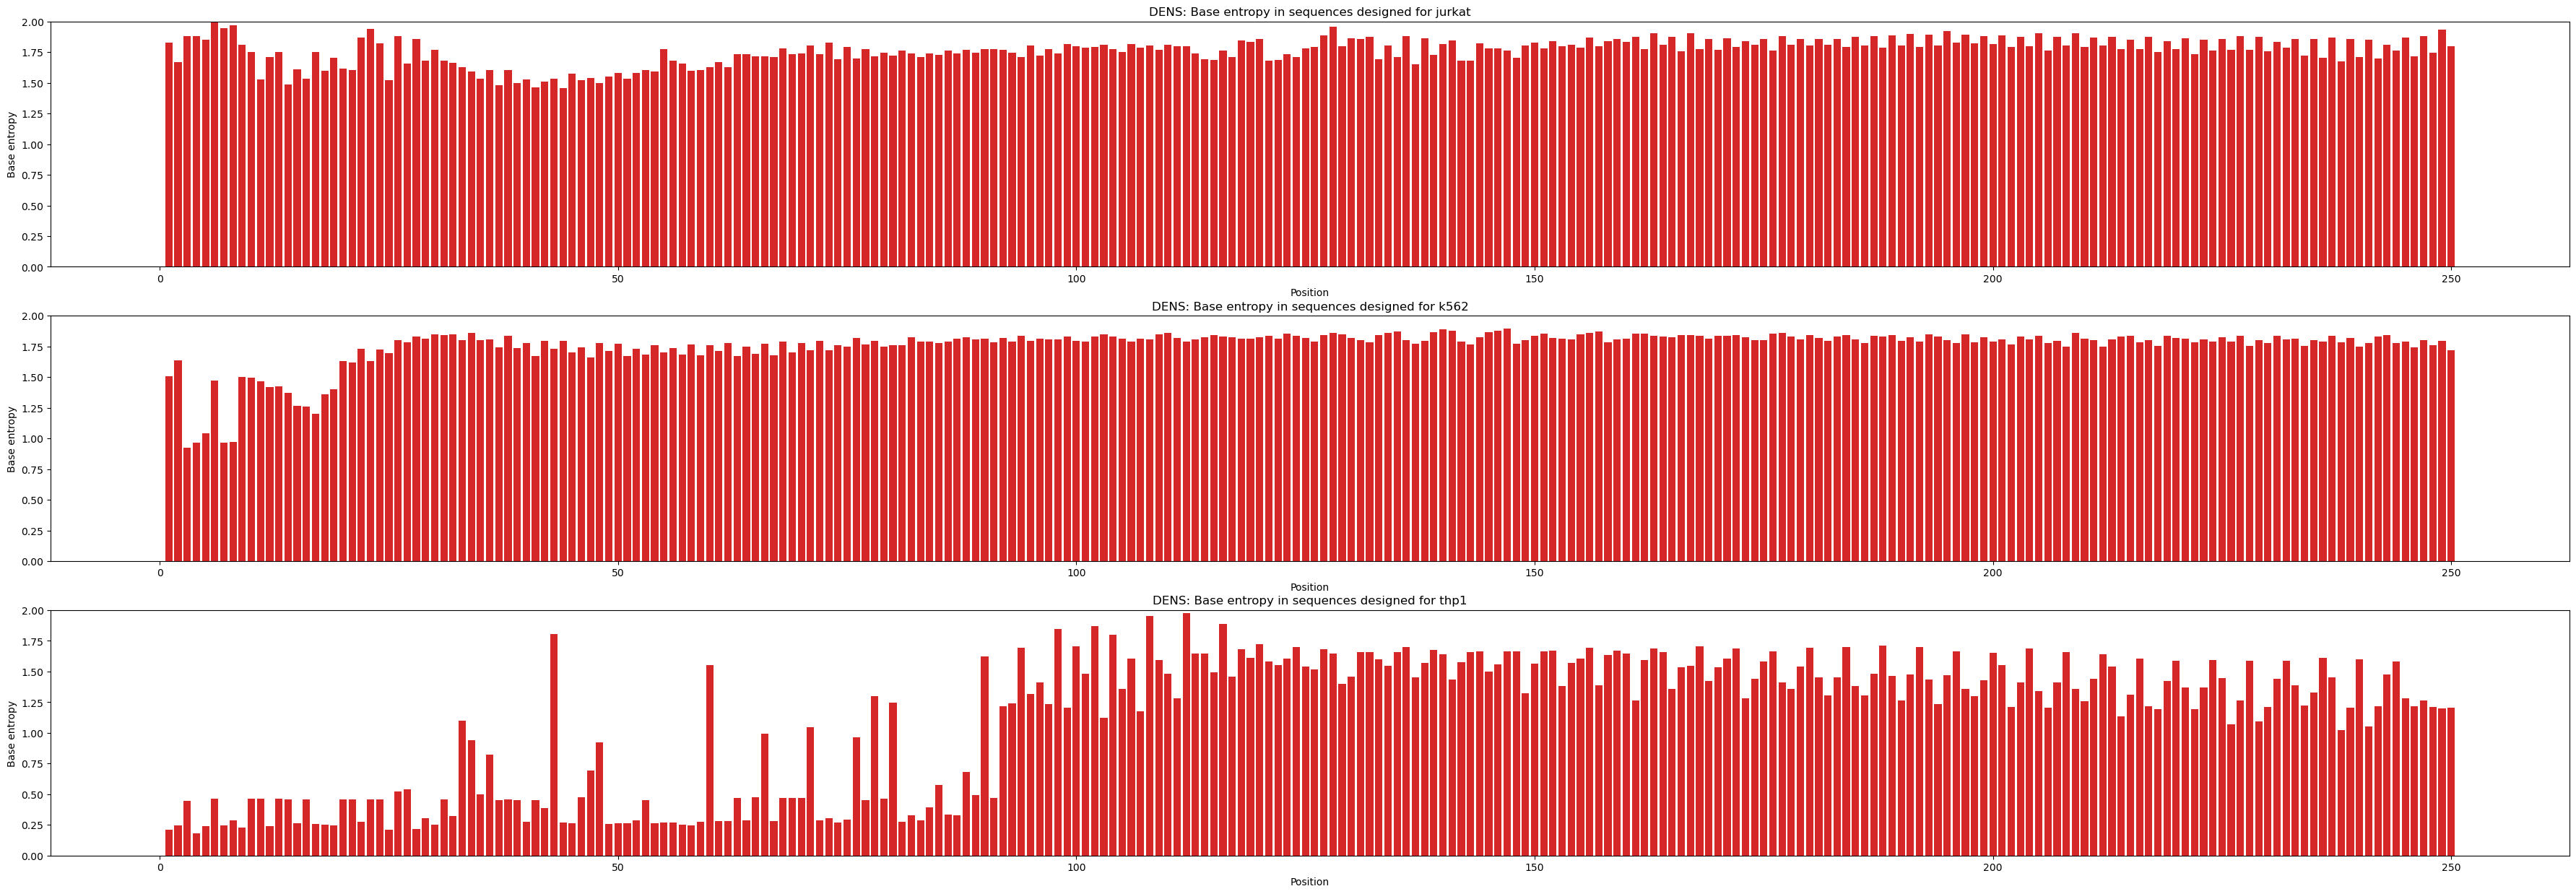

In [4]:
methods = ["coms", "dens"]
num_seqs = [None, None]

for i, method in enumerate(methods):
    print(method, num_seqs[i])
    seqs = pickle.load(open(os.path.join(final_design_seqs_dir, f"{method}_final_design.pkl"), "rb"))
    seqs_df = []
    kmer_features = {}
    for cell in ["jurkat", "k562", "thp1"]:
        kmer_features[cell] = seqs[cell]["kmer_features"]
        seqs[cell].pop("kmer_features")
        df = pd.DataFrame(seqs[cell])
        df["designed_for"] = cell
        
        if num_seqs[i] is not None:
            df = df.tail(num_seqs[i])
        
        seqs_df.append(df)
    
    seqs_df = pd.concat(seqs_df).reset_index(drop=True)
    
    fix, ax = plt.subplots(3, 1, figsize=(45, 15))
    fix2, ax2 = plt.subplots(3, 1, figsize=(45, 15))
    for j, cell in enumerate(["jurkat", "k562", "thp1"]):
        x = get_base_usage(list(seqs_df[seqs_df["designed_for"] == cell]["sequences"]))
        plot_base_usage(x, "{}: Base usage in sequences designed for {}".format(method.upper(), cell), ax[j])
        plot_base_entropy(x, "{}: Base entropy in sequences designed for {}".format(method.upper(), cell), ax2[j])
        
    # show the plot
    plt.show()